In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, weights=None):
        self.input_size = input_size
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * prediction * (1 - prediction) * inputs

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))



In [2]:
x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,0.064775,0.074421
1,0.325578,0.497319
2,0.081736,1.159518
3,0.053192,-0.022444
4,0.504479,0.387099
...,...,...
395,-0.308411,-2.315298
396,-2.690173,1.099032
397,-1.195448,2.093523
398,2.614705,1.642373


In [3]:
y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
395,-1
396,-1
397,-1
398,-1


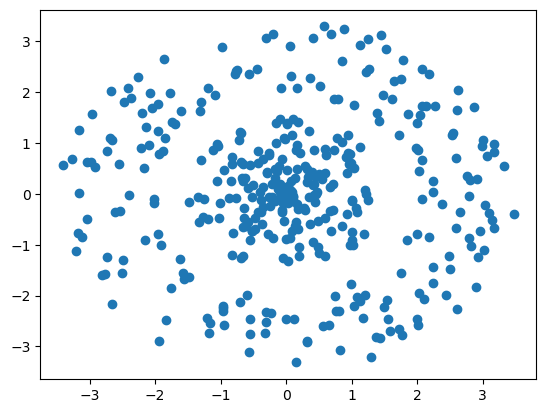

In [4]:
plt.scatter(x['X'], x['Y'])

In [5]:
# Transform the training inputs into a polynomial feature set
poly = PolynomialFeatures(2)
training_inputs = poly.fit_transform(x)
labels = y.values
# Initialize the perceptron with the new input size
perceptron = Perceptron(input_size=training_inputs.shape[1], epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(training_inputs, labels)

Epoch: 0 Accuracy: 75.0
Epoch: 1 Accuracy: 70.5
Epoch: 2 Accuracy: 72.0
Epoch: 3 Accuracy: 76.5
Epoch: 4 Accuracy: 79.0
Epoch: 5 Accuracy: 80.5
Epoch: 6 Accuracy: 83.0
Epoch: 7 Accuracy: 83.5
Epoch: 8 Accuracy: 84.5
Epoch: 9 Accuracy: 85.5
Epoch: 10 Accuracy: 87.0
Epoch: 11 Accuracy: 89.0
Epoch: 12 Accuracy: 89.0
Epoch: 13 Accuracy: 89.5
Epoch: 14 Accuracy: 90.5
Epoch: 15 Accuracy: 92.0
Epoch: 16 Accuracy: 92.0
Epoch: 17 Accuracy: 93.0
Epoch: 18 Accuracy: 93.0
Epoch: 19 Accuracy: 93.5
Epoch: 20 Accuracy: 94.5
Epoch: 21 Accuracy: 95.0
Epoch: 22 Accuracy: 95.0
Epoch: 23 Accuracy: 95.0
Epoch: 24 Accuracy: 96.0
Epoch: 25 Accuracy: 96.5
Epoch: 26 Accuracy: 96.5
Epoch: 27 Accuracy: 97.0
Epoch: 28 Accuracy: 97.0
Epoch: 29 Accuracy: 97.0
Epoch: 30 Accuracy: 97.5
Epoch: 31 Accuracy: 98.0
Epoch: 32 Accuracy: 98.0
Epoch: 33 Accuracy: 98.5
Epoch: 34 Accuracy: 98.5
Epoch: 35 Accuracy: 99.0
Epoch: 36 Accuracy: 99.0
Epoch: 37 Accuracy: 99.0
Epoch: 38 Accuracy: 99.0
Epoch: 39 Accuracy: 99.0
Epoch: 40 

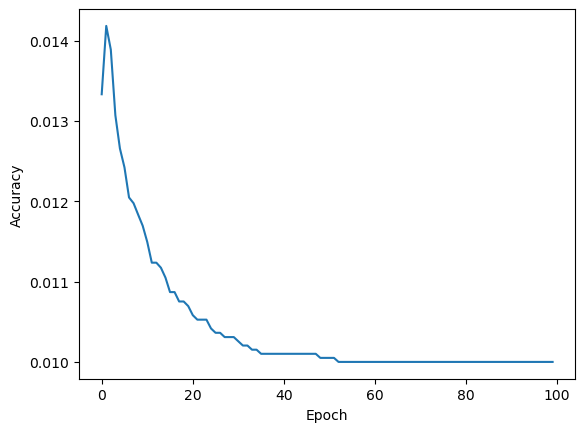

In [6]:
# Plot the accuracy graph
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

/Users/juancisneros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


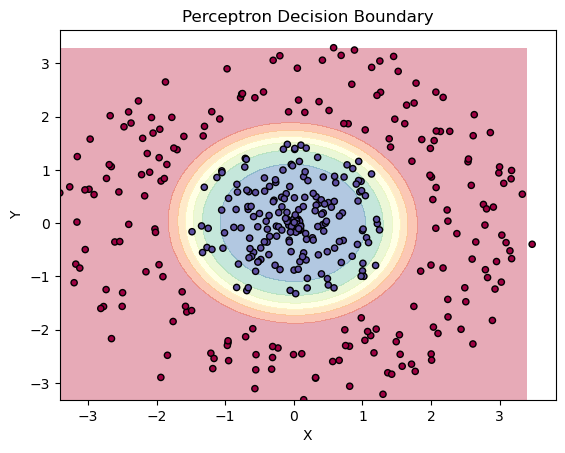

In [7]:
def plot_decision_boundary(perceptron, x, y, poly):
    # Definir la malla de puntos
    x_min, x_max = x['X'].min(), x['X'].max()
    y_min, y_max = x['Y'].min(), x['Y'].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Preparar datos de la malla y transformarlos a polinomial
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid_data)

    # Calcular las predicciones en la malla
    Z = perceptron.predict(grid_poly)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)

    # Graficar los puntos de datos
    scatter = plt.scatter(x['X'], x['Y'], c=y['Class'], s=20, edgecolor='k', cmap=plt.cm.Spectral)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Decision Boundary')
    plt.show()

# Usar la función para graficar el límite de decisión
plot_decision_boundary(perceptron, x, y, poly)
